In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Loading Data

In [41]:
x = pd.read_csv('./Sensor-logger-dataset/Accel-x-10.2s.csv')
y = pd.read_csv('./Sensor-logger-dataset/accel-y-10.5s.csv')
z = pd.read_csv('./Sensor-logger-dataset/accel-z-11.2s.csv')
x
frames = [x, y, z]
#combine 3 different frames into 1 frame
frames = pd.concat(frames)
print(frames.shape)
frame_dropped = frames.drop(['time', 'seconds_elapsed'], axis=1)
print(frame_dropped.shape)
data = frame_dropped.to_numpy()

(1607, 5)
(1607, 3)


# Approach
<b>1. specify K</b>

<b>2. randomly initialize k centroids</b>

<b>3. perform iteration until centroid is not changed</b>

    a. calculate The distance from each point to each centroid
    b. points are assigned to their nearest centroid.
    c. update centroid by computing mean in each cluster



# define distnace function

In [40]:
from scipy.spatial.distance import cdist

class K_Means:
    
    def __init__(self, k=3, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    #distance function
    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1-point2, axis=0)
        
#     def predict(self,data):
#         distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
#         classification = distances.index(min(distances))
#         return classification
    
    def fit(self, data):
        self.dict_centroid_point = {}
        for i in range(self.k): 
            self.dict_centroid_point[i] = data[i] #data[0], data[1], data[2] are assgined as centroids
            #{0:data[0], 1:data[1], 2:data[2]}
        
        for i in range(self.max_iterations):
            self.dict_class_points = {} 
            for j in range(self.k):
                self.dict_class_points[j] = []
                #{0:[], 1:[], 2:[]}
                #{label_0: [pint0, point1..], label_1:[points..]}
                
            for point in data:
                distances = []
                for index in self.dict_centroid_point:
                    #compare each point with centroid
                    distances.append(self.euclidean_distance(point,self.dict_centroid_point[index]))
                #append points to my_dict dic values; the point has the cloasest distance to a centroid
                cluster_index = np.argmin(distances)
                self.dict_class_points[cluster_index].append(point) # my_dict = {0:[], 1:[], 2:[]}
                # print(self.my_dict)
            
            previous = dict(self.dict_centroid_point) #dict or without dict
            
            #update centroid with avg value
            for cluster_index in self.dict_class_points:
                self.dict_centroid_point[cluster_index] = np.average(self.dict_class_points[cluster_index], axis = 0)
                # print(self.dict_centroid_point[cluster_index])

                
            isOptimal = True
            
            for centroid in self.dict_centroid_point:
                prev = previous[centroid]
                curr = self.dict_centroid_point[centroid]
                #curr - prev =
                if np.sum((curr - prev)/prev * 100.0) > self.tolerance: #curr - prev = [ctr0, ctr1, ctr2]
                    isOptimal = False
            if isOptimal:
                break

(1607, 2)


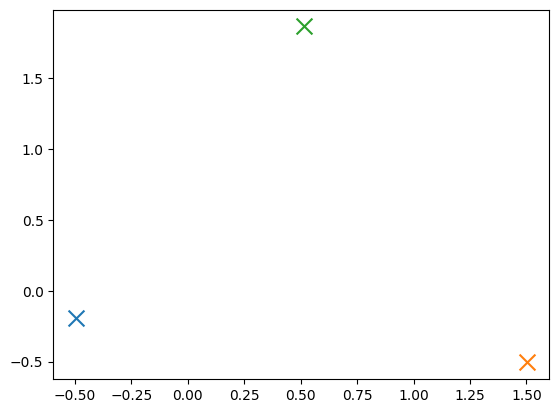

In [44]:

k_means = K_Means(3)
pca = PCA(n_components=2)
data_projected = pca.fit_transform(data)
k_means.fit(data_projected)

# pca = PCA(n_components=2)
# data_projected = pca.fit_transform(data)
print(data_projected.shape)

colors = 10*["r", "g", "c", "b", "k"]

for centroid in k_means.dict_centroid_point:
    plt.scatter(k_means.dict_centroid_point[centroid][0], k_means.dict_centroid_point[centroid][1], s = 130, marker = "x")

# for cluster_index in k_means.dict_class_points:
#     color = colors[cluster_index]
#     for features in k_means.dict_class_points[cluster_index]:
#         plt.scatter(features[0], features[1], color = color,s = 30)

